## KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
spotify = pd.read_csv('../Data/spotify_cleaned.csv', index_col='track_id')
spotify_encoded = pd.read_csv('../Data/spotify_encoded.csv', index_col='track_id')

scaler = StandardScaler()
spotify_encoded['popularity'] = scaler.fit_transform(spotify_encoded[['popularity']])

spotify_encoded

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_id,,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,1.964615,-0.004759,-0.309921,0.648283,-0.678397,-1.205833,0.350223,-1.306583,0.448128,-0.868312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4qPNDBW1i3p13qLCt0Ki3A,1.040813,-0.692843,-0.309921,-0.781882,-1.818618,-1.205833,-1.616854,0.765355,-0.117369,1.756407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1iJBSr7s7jYXzM8EGcbK5b,1.143458,-0.173180,-0.309921,-0.681324,-1.072643,-1.486792,-0.210138,0.765355,-0.292021,-0.345016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6lfxq3CG4xtTiEg7opyCyx,1.861970,-0.248673,-0.309921,-1.642216,-2.229870,-1.486792,-1.856901,0.765355,-0.456498,1.700487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5vjLSffimiIP26QG5WcN2K,2.426516,-0.274819,-0.309921,0.324261,-0.747970,-0.924873,-0.200198,0.765355,-0.318303,0.417265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2C3TZjDRiAzdyViavDJ217,-0.704145,1.305375,-0.309921,-2.167354,-1.551922,-0.081996,-1.458947,0.765355,-0.406476,0.920547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1hIz5L4IB9hN3WRYPOCGPw,-0.652822,1.305383,-0.309921,-2.156181,-2.008010,-1.486792,-1.819956,-1.306583,-0.424281,1.962429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6x8ZfSoqDjuNa5SVP5QjvX,-0.652822,0.341593,-0.309921,0.385714,-1.188598,-1.486792,-0.427868,-1.306583,-0.408172,1.588646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


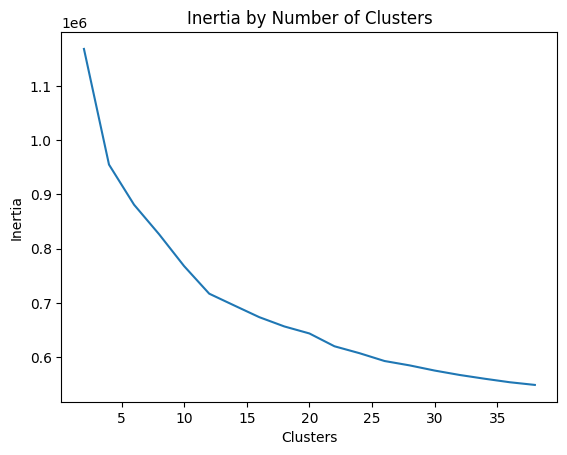

In [3]:
inertias = []
for k in np.arange(2, 40, 2):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_encoded)

    inertias.append(kmeans.inertia_)

plt.plot(np.arange(2, 40, 2), inertias)
plt.title('Inertia by Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()



In [13]:
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(spotify_encoded)

KMeans(n_clusters=10, random_state=42)

In [14]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = spotify_encoded.columns.tolist()
cl_pos.drop([col for col in cl_pos.columns if col.startswith('track_genre_')], axis=1, inplace=True)
cl_pos

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.213871,-0.229307,3.218830,0.376333,0.329552,0.005339,0.359802,-0.092471,1.082691,-0.274791,-0.402468,0.126123,0.008585,-0.015207,0.182195
1,0.043728,0.084402,-0.309921,-0.692884,0.711968,-0.063595,0.610985,0.299684,-0.039131,-0.748524,-0.438209,-0.091962,-0.463074,0.748100,0.088989
2,0.092086,-0.189098,-0.309921,0.652301,0.299542,-0.113371,0.356051,0.765355,-0.103257,-0.247952,-0.483296,-0.244599,0.902342,-0.089315,0.185877
3,-0.407195,-0.027245,-0.302069,-0.121010,0.485806,0.070585,0.124664,-0.207745,-0.139675,-0.619921,1.826469,-0.167394,-0.511837,0.189007,0.122523
4,-0.193006,-0.314918,-0.061470,-1.187944,-0.842565,-0.071202,-1.137963,0.060305,0.226618,0.742731,0.597693,0.337177,-0.736184,-0.964369,-6.667911
5,-0.598010,2.471112,-0.289275,0.565298,0.136589,0.107015,-0.314318,-0.223654,-0.186317,-0.642769,1.481462,-0.327362,-0.425982,0.099844,0.137117
6,0.216187,-0.067118,-0.309921,0.512520,0.336888,0.262243,0.386054,-1.306583,-0.025955,-0.356436,-0.460995,-0.227245,0.485900,-0.060045,0.189501
7,0.021951,0.062432,-0.294511,-0.270448,0.407707,0.006371,0.191423,0.105897,0.360900,0.063332,-0.362124,2.787405,0.118691,-0.011497,0.093770
8,0.005134,-0.159364,-0.306735,-0.240431,-1.114797,-0.086253,-0.466814,0.317235,-0.314049,1.176908,-0.409804,-0.303090,-0.313977,-0.290802,-0.145136
9,-0.280287,-0.141296,-0.305531,-1.169689,-1.817339,-0.124895,-2.412489,0.042253,-0.314427,1.613255,1.828539,-0.335108,-1.058238,-0.560611,-0.224884


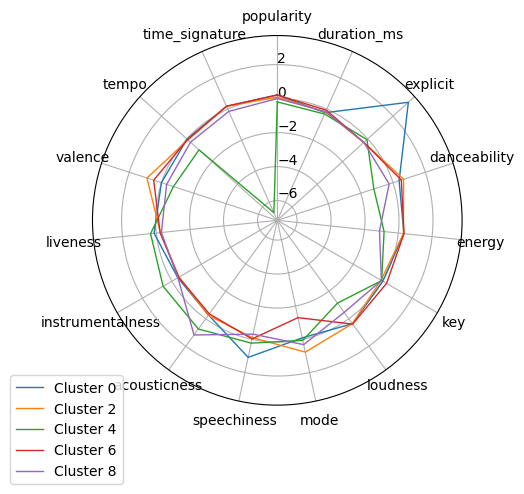

In [16]:
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
categories= radar_df.columns.tolist()[1:]
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)

for i in range(0, num_clusters, 2):
    values=radar_df.loc[i].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle=None, label=f'Cluster {i}')
    #ax.fill(angles, values, 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [17]:
def recommend_songs(track_ids, data, data_standard, clusters, top_n=5):
    input_clusters = clusters.loc[track_ids].unique()
    
    filter_mask = clusters.isin(input_clusters)
    filtered_data_standard = data_standard[filter_mask]
    filtered_data = data[filter_mask]
    
    input_vectors = filtered_data_standard.loc[track_ids].values
    distances = np.linalg.norm(filtered_data_standard.values[:, None] - input_vectors, axis=2).sum(axis=1)

    distance_df = pd.DataFrame(distances, index=filtered_data_standard.index, columns=['distance'])
    sorted_songs = distance_df.sort_values(by='distance')
    
    recommendations = sorted_songs.drop(track_ids).head(top_n)
    recommendations = recommendations[~recommendations.index.duplicated(keep='first')]
    
    return filtered_data.loc[recommendations.index][['track_name', 'artists', 'album_name', 'track_genre']]

In [18]:
clusters = pd.Series(kmeans.labels_, index=spotify.index)

classical_track_ids = ['5ljHk6rwIFtX83jenOl8Q3', '1iDb9PtzYXk5xYw7JkQ3VT', '4gj2XS6vLhDBuiduScHjRX']
spotify.loc[classical_track_ids][['track_name', 'artists', 'album_name', 'track_genre']]

,track_name,artists,album_name,track_genre
track_id,,,,
5ljHk6rwIFtX83jenOl8Q3,"Der Nussknacker, Op. 71: Schneeflockenwalzer",Pyotr Ilyich Tchaikovsky;phil Blech Wien;Anton...,Classical Christmas,classical
1iDb9PtzYXk5xYw7JkQ3VT,"Children's Corner, L. 113: I. Doctor Gradus Ad...",Claude Debussy;Seong-Jin Cho,Clsica para los nios de hoy,classical
4gj2XS6vLhDBuiduScHjRX,Bach : The Well-Tempered Clavier Book I. Fugue...,Johann Sebastian Bach;RIMA,Early Morning Classic,classical


In [19]:
recommended_songs = recommend_songs(classical_track_ids, spotify, spotify_encoded, clusters)
recommended_songs

,track_name,artists,album_name,track_genre
track_id,,,,
1VsXbdekUKQ0KJIBaqC96E,"4 Impromptus, Op. 90, D. 899: II. Allegro - Coda",Franz Schubert;Yanica Hristova,"Schubert: Impromptus, D. 899 - Baynov, Stoyano...",classical
2SNcSWDurvPuyfRveaJ9Qv,"Bagatelle in A Minor, WoO 59 ""Fr Elise""",Ludwig van Beethoven;Anatol Ugorski,Relajacin y siestas,classical
7A6xUNWiKHoZG1oQzypNJ2,"Piano Sonata No. 4 in E-Flat Major, K. 282: 1b...",Wolfgang Amadeus Mozart;Claire-Marie Le Guay,Mozart - All Day Classics,classical
1gUJXmcIstf3QSbowiWuPK,"Cello Sonata in C Major, Op. 119: II. Moderato",Sergei Prokofiev;Miriam K. Smith;Sandra Wright...,Momentum,classical
4vgWIKG0kmxliL4swyMhZc,"Concerto grosso in G Minor, Op. 6, No. 8, ""Fat...",Arcangelo Corelli;The English Concert;Trevor P...,Classical Christmas 2022,classical


In [20]:
pop_track_ids = ['0KKkJNfGyhkQ5aFogxQAPU', '6vJaXvEXh6HOeiEZLFDhrp', '0azC730Exh71aQlOt9Zj3y']
spotify.loc[pop_track_ids][['track_name', 'artists', 'album_name', 'track_genre']]

,track_name,artists,album_name,track_genre
track_id,,,,
0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,24K Magic,dance
6vJaXvEXh6HOeiEZLFDhrp,You Belong With Me (Taylors Version),Taylor Swift,Sunny Mornings,pop
0azC730Exh71aQlOt9Zj3y,This Is What You Came For,Calvin Harris;Rihanna,This Is What You Came For,dance


In [21]:
recommended_songs = recommend_songs(pop_track_ids, spotify, spotify_encoded, clusters)
recommended_songs

,track_name,artists,album_name,track_genre
track_id,,,,
6cmm1LMvZdB5zsCwX5BjqE,Down,Jay Sean;Lil Wayne,All Or Nothing,dance
59qrUpoplZxbIZxk6X0Bm3,Take You Dancing,Jason Derulo,Take You Dancing,dance
0ClPIeT6MSgfSgQ9ZrJbAq,Cheating on You,Charlie Puth,Cheating on You,dance
6T689Jvh5KrSXyaPtUWZtQ,Criminal,Britney Spears,Femme Fatale (Deluxe Version),dance
4vVTI94F9uJ8lHNDWKv0i2,Eenie Meenie,Sean Kingston;Justin Bieber,Eenie Meenie,dance
